In [32]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)


In [35]:
shots_arg_chi = pd.read_csv('data/arg-chile-shots.csv')
shots_arg = shots_arg_chi[shots_arg_chi["Team Name"] == "ARGENTINA"]
shots_arg['Start Y'] = abs(shots_arg['Start Y']-68)

/var/folders/6v/mydq28cs5jsf5r12rn8vl4vr0000gn/T/ipykernel_4922/1578423986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_arg['Start Y'] = abs(shots_arg['Start Y']-68)


In [36]:
shots_arg

,Match ID,Team ID,Team Name,Player From ID,Player From Name,Event ID,Event Description,Tags,Period ID,Period Description,Start Minute,Start Second,End Minute,End Second,Intersection Point,Intersection Point Norm,Start X,Start Y,End X,End Y,Next Event Description,Shot On Target
0,131479,421,ARGENTINA,11569.0,RODRIGO DE PAUL,5,Shot,"Off Target, Blocked, Right, From outside the P...",1,1t,11,50,12,2,105.00;29.51;2.85,105.00;29.51;2.85,74.40,32.38,80.03,37.16,Shot Against,False
1,131479,421,ARGENTINA,26457.0,JULIAN ALVAREZ,5,Shot,"On Target, GK Save, Promising Action, Left, Fr...",1,1t,21,10,21,22,105.00;30.82;0.21,105.00;30.82;0.21,97.14,37.93,102.15,31.13,Shot Against,True
2,131479,421,ARGENTINA,11569.0,RODRIGO DE PAUL,5,Shot,"Right, From inside the Penalty Area, Off Target",1,1t,25,20,25,32,105.00;33.82;4.50,105.00;33.82;4.50,89.46,17.62,105.00,33.82,Shot Against,False
3,131479,421,ARGENTINA,11569.0,RODRIGO DE PAUL,5,Shot,"On Target, Blocked, Right, From outside the Pe...",1,1t,26,34,26,46,105.00;30.78;0.82,105.00;30.78;0.82,86.47,28.87,87.38,38.42,Offensive\nAction,True
4,131479,421,ARGENTINA,35040.0,ENZO FERNANDEZ,5,Shot,"On Target, GK Save, Right, From outside the Pe...",1,1t,26,41,26,53,105.00;37.48;0.02,105.00;37.48;0.02,84.48,47.59,101.89,34.98,Shot Against,True
5,131479,421,ARGENTINA,26456.0,NICOLAS GONZALEZ,5,Shot,"GK Save, Promising Action, Headed Shot, From o...",1,1t,29,27,29,39,105.00;48.07;0.07,105.00;48.07;0.07,87.37,36.04,97.25,34.63,Offensive\nAction,False
6,131479,421,ARGENTINA,7421.0,LIONEL MESSI,5,Shot,"Post, Left, From outside the Penalty Area, Off...",1,1t,35,32,35,44,105.00;37.66;0.05,105.00;37.66;0.05,79.60,30.57,105.00,37.66,Shot Against,False
7,131479,421,ARGENTINA,32684.0,ALEXIS MAC ALLISTER,5,Shot,"GK Save, Left, From outside the Penalty Area, ...",1,1t,44,7,44,19,105.00;28.86;0.10,105.00;28.86;0.10,80.71,42.89,86.85,26.42,Shot Against,False
8,131479,421,ARGENTINA,26457.0,JULIAN ALVAREZ,5,Shot,"Left, From outside the Penalty Area, Off Target",1,1t,45,12,45,24,105.00;42.09;4.50,105.00;42.09;4.50,87.30,46.33,105.00,42.09,Shot Against,False
9,131479,421,ARGENTINA,11569.0,RODRIGO DE PAUL,5,Shot,"Right, From outside the Penalty Area, Off Target",1,1t,46,48,47,0,105.00;28.21;4.50,105.00;28.21;4.50,82.20,37.97,105.00,28.21,Shot Against,False


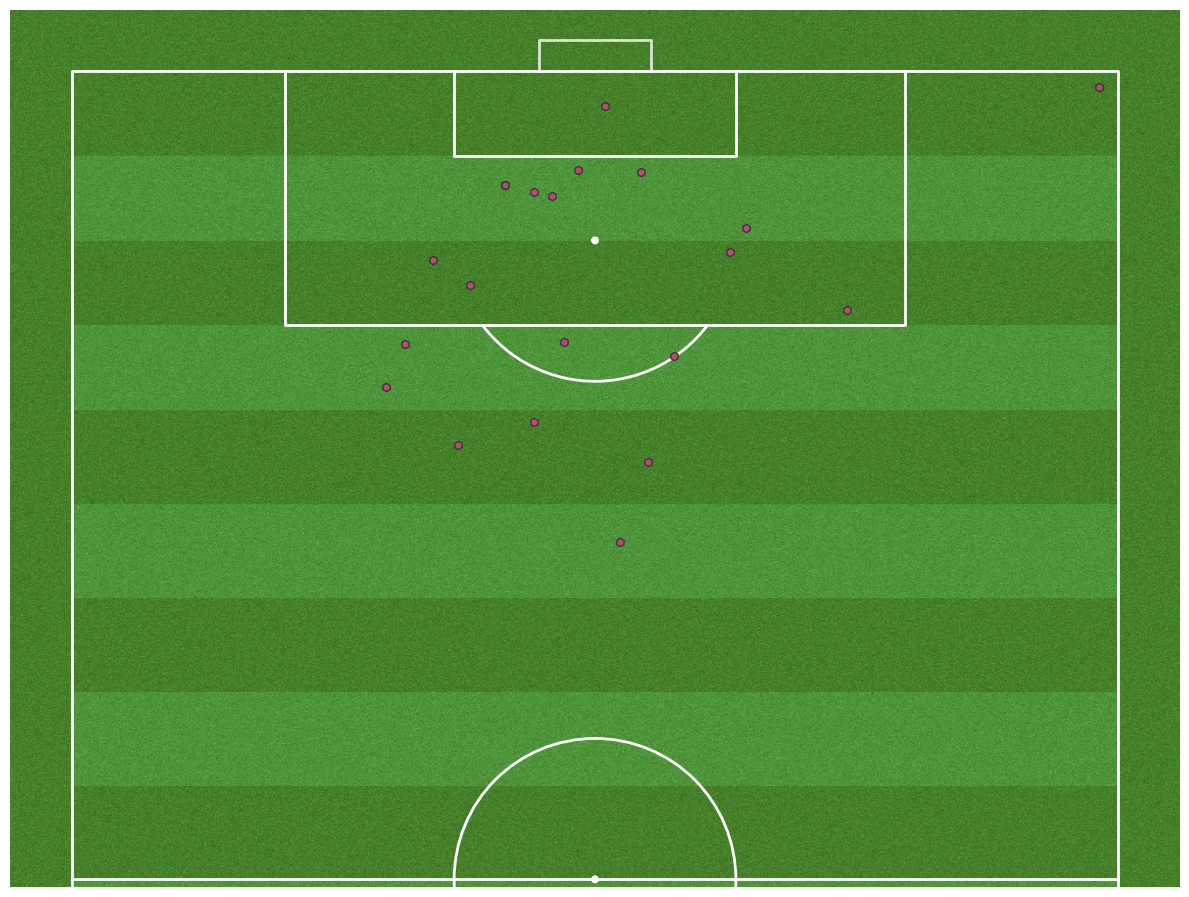

In [34]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      goal_type='box',
                      goal_alpha=0.8,pitch_type='uefa', half=True, pitch_color='grass', line_color='white', stripe=True)
# control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
sc = pitch.scatter(shots_arg["Start X"], shots_arg["Start Y"],
                   # size varies between 100 and 1000 (points squared)
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)

# txt = ax.text(x=40, y=80, s='Argentina shots against Chile',
#               size=30,
#               # here i am using a downloaded font from google fonts instead of passing a fontdict
#               color=pitch.line_color,
#               fontdict="",
#               va='center', ha='center')